In [36]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


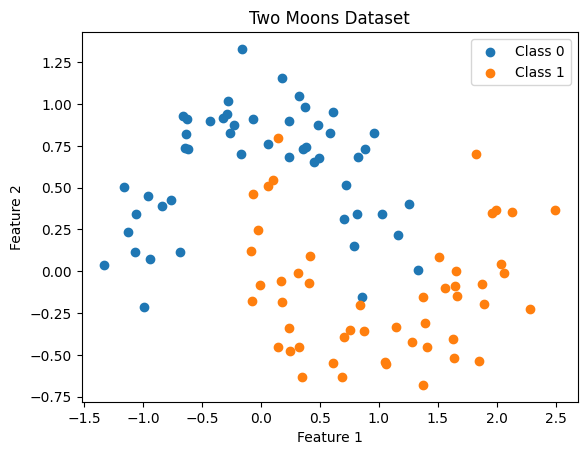

In [37]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate moons dataset
X, y = make_moons(n_samples=100, noise=0.18, random_state=42)

# Visualize the data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1")
plt.legend()
plt.title("Two Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42
)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [41]:
import sys
import os

sys.path.append(os.path.abspath('..'))

from MLP.nn import MLP
from MLP.grad_engine import Value

In [42]:
EPOCH = 2000
lr    = 0.1

In [43]:
clf = MLP(
    n_inputs=2,
    layers=[
        (4, "tanh"),
        (4, "tanh"),
        (1, "sigmoid")
    ],
    epochs=EPOCH,
    learning_rate=lr
)

In [44]:
clf.fit(X_train_scaled, y_train, loss_fn="binary_cross_entropy", patience = 20)

EPOCH 0: binary_cross_entropy = 0.9087000427749873
EPOCH 1: binary_cross_entropy = 0.8997215358786161
EPOCH 2: binary_cross_entropy = 0.8916789139764503
EPOCH 3: binary_cross_entropy = 0.8841858369125037
EPOCH 4: binary_cross_entropy = 0.8770318452221062
EPOCH 5: binary_cross_entropy = 0.8701203545061343
EPOCH 6: binary_cross_entropy = 0.8634549902191475
EPOCH 7: binary_cross_entropy = 0.8571228088738518
EPOCH 8: binary_cross_entropy = 0.8512451013420134
EPOCH 9: binary_cross_entropy = 0.8459106261465394
EPOCH 10: binary_cross_entropy = 0.8411379792175963
EPOCH 11: binary_cross_entropy = 0.8368853056597161
EPOCH 12: binary_cross_entropy = 0.8330816212900567
EPOCH 13: binary_cross_entropy = 0.8296521449831827
EPOCH 14: binary_cross_entropy = 0.826530496287722
EPOCH 15: binary_cross_entropy = 0.8236619331912678
EPOCH 16: binary_cross_entropy = 0.8210025792360606
EPOCH 17: binary_cross_entropy = 0.8185174487299648
EPOCH 18: binary_cross_entropy = 0.8161784335885213
EPOCH 19: binary_cross_

In [45]:
probs = clf(X_test_scaled).data

# threshold at 0.5 to get 0/1 predictions
preds = (probs > 0.5).astype(int)

# compute accuracy
accuracy = (preds.flatten() == y_test.flatten()).mean()
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 1.000


In [46]:
import numpy as np 

def plot_decision_boundary_custom(clf, X, y, scaler=None, resolution=0.01):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    grid = np.c_[xx.ravel(), yy.ravel()]

    if scaler:
        grid_scaled = scaler.transform(grid)
    else:
        grid_scaled = grid

    # Predict on grid
    Z = (clf(grid_scaled).data > 0.5)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.5)

    # Plot original data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", edgecolor='k')
    plt.legend()
    plt.title("Decision Boundary")
    plt.show()

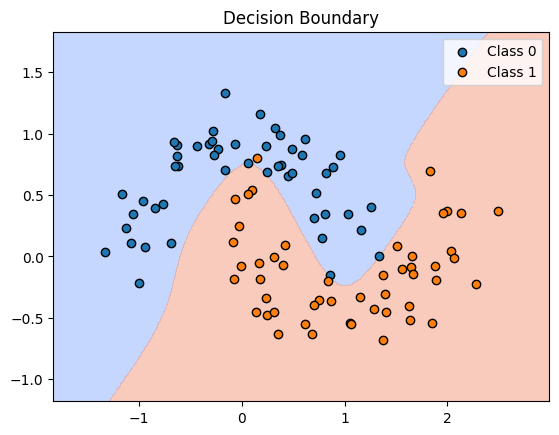

In [47]:
plot_decision_boundary_custom(clf, X, y, scaler=scaler, resolution=0.01)

In [34]:
import sys
import os

sys.path.append(os.path.abspath('../../../../test_scalar/'))

from nn_s import MLP as MLP_scalar
from grad_engine_s import Value as Value_scalar

In [35]:
clf_s = MLP_scalar(
    n_inputs=2,
    layers=[
        (8, "relu"),
        (8, "relu"),
        (1, "sigmoid")
    ],
    epochs=1000,
    learning_rate=lr
)

In [36]:
clf_s.fit(X_train_scaled, y_train, loss_fn="binary_cross_entropy", patience = 20)

EPOCH 0: binary_cross_entropy = [[0.96398457]]
EPOCH 1: binary_cross_entropy = [[0.73664608]]
EPOCH 2: binary_cross_entropy = [[0.63606583]]
EPOCH 3: binary_cross_entropy = [[0.57248063]]
EPOCH 4: binary_cross_entropy = [[0.5253576]]
EPOCH 5: binary_cross_entropy = [[0.4893831]]
EPOCH 6: binary_cross_entropy = [[0.46106856]]
EPOCH 7: binary_cross_entropy = [[0.43825662]]
EPOCH 8: binary_cross_entropy = [[0.41955103]]
EPOCH 9: binary_cross_entropy = [[0.40395358]]
EPOCH 10: binary_cross_entropy = [[0.39062537]]
EPOCH 11: binary_cross_entropy = [[0.37919383]]
EPOCH 12: binary_cross_entropy = [[0.36923646]]
EPOCH 13: binary_cross_entropy = [[0.36047562]]
EPOCH 14: binary_cross_entropy = [[0.35272521]]
EPOCH 15: binary_cross_entropy = [[0.34580327]]
EPOCH 16: binary_cross_entropy = [[0.33960424]]
EPOCH 17: binary_cross_entropy = [[0.33404737]]
EPOCH 18: binary_cross_entropy = [[0.32898565]]
EPOCH 19: binary_cross_entropy = [[0.32439472]]
EPOCH 20: binary_cross_entropy = [[0.32017071]]
EPOC

KeyboardInterrupt: 

In [ ]:


def plot_decision_boundary_custom_s(clf, X, y, scaler=None, resolution=0.01):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    grid = np.c_[xx.ravel(), yy.ravel()]

    if scaler:
        grid_scaled = scaler.transform(grid)
    else:
        grid_scaled = grid

    # Predict on grid
    Z = np.array([clf(x).data > 0.5 for x in grid_scaled])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.5)

    # Plot original data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", edgecolor='k')
    plt.legend()
    plt.title("Decision Boundary")
    plt.show()

In [ ]:
plot_decision_boundary_custom_s(clf_s, X, y, scaler=scaler, resolution=0.01)